In [1]:
!pip install statsmodels==0.12.2

#**Import necessary modules/ libs**

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime
import seaborn as sbn

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.simplefilter("ignore")

#**Load 4 stock datasets**

In [3]:
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
aapl = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
googl = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [4]:
ibm.to_csv('IBM_stock.csv', sep=',')
aapl.to_csv('Apple_stock.csv', sep=',')
fb.to_csv('Facebook_stock.csv', sep=',')
googl.to_csv('Google_stock.csv', sep=',')

#**[1] IBM Stock Dataset analysis**

In [5]:
ibm = pd.DataFrame(ibm, columns=['High','Low','Open','Close','Adj Close'])
ibm.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2014-08-01,191.500000,188.860001,190.500000,189.149994,143.561371
2014-08-04,189.949997,188.600006,189.350006,189.639999,143.933304
2014-08-05,189.199997,186.440002,188.750000,187.100006,142.005493
2014-08-06,186.880005,184.440002,185.360001,185.970001,141.982544
2014-08-07,186.679993,183.580002,186.639999,184.300003,140.707535


#**Describe the IBM dataset**

In [6]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Adj Close  589 non-null    float64
dtypes: float64(5)
memory usage: 27.6 KB


In [7]:
ibm.describe(include='all')

,High,Low,Open,Close,Adj Close
count,589.000000,589.000000,589.000000,589.000000,589.000000
mean,157.737182,155.463786,156.583566,156.617402,123.461819
std,15.227783,15.364561,15.325756,15.263828,10.790073
min,119.660004,116.900002,118.459999,117.849998,94.504570
25%,148.649994,146.449997,147.610001,147.889999,117.349693
50%,158.369995,155.679993,157.070007,156.949997,124.090508
75%,164.000000,161.830002,162.770004,162.880005,129.907471
max,195.000000,193.190002,194.539993,194.000000,148.113205


#**Check for null values in IBM dataset**

In [8]:
ibm.isnull().sum()

High         0
Low          0
Open         0
Close        0
Adj Close    0
dtype: int64

#**Visualize the IBM dataset**

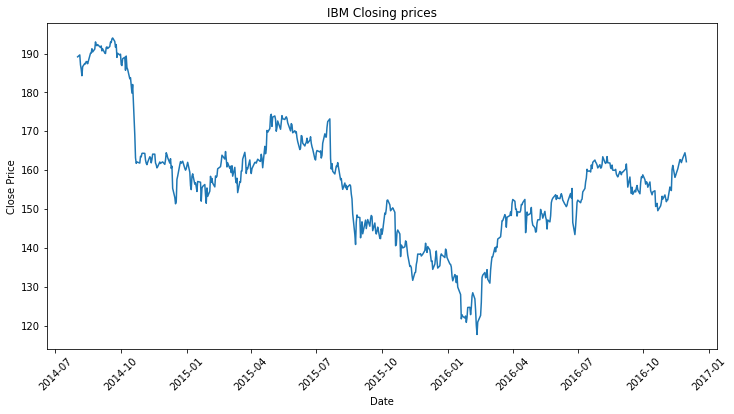

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(ibm['Close'])
plt.title('IBM Closing prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

#**Visualize up and downs in IBM stock prices**

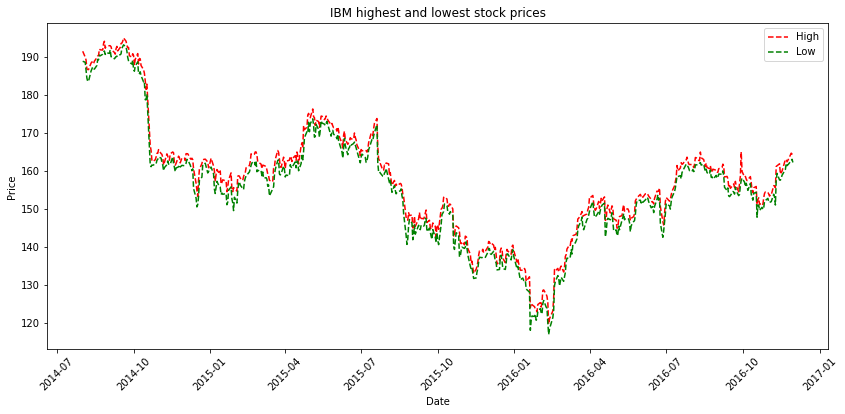

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(ibm['High'],'r--', label='High')
plt.plot(ibm['Low'],'g--', label='Low')
plt.title('IBM highest and lowest stock prices')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

#**Visualize short-term average of IBM stock prices**

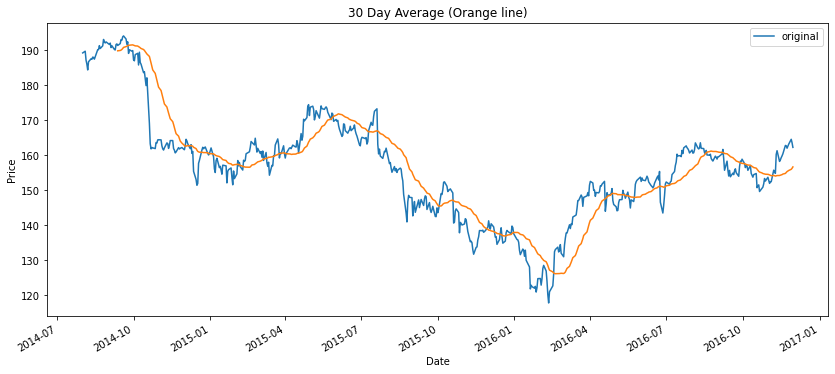

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(ibm['Close'], label='original')
plt.title('30 Day Average (Orange line)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
ibm['Close'].rolling(window=30).mean().plot()
plt.show()

#**Explore IBM stock dataset with outilier detection**

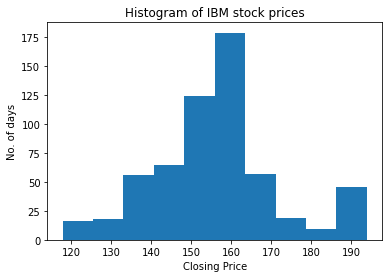

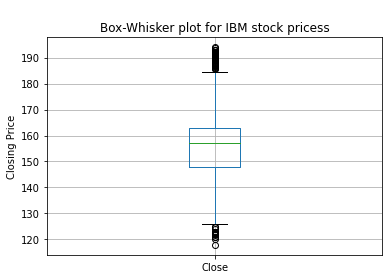

In [12]:
plt.title("Histogram of IBM stock prices")
plt.hist(ibm['Close'])
plt.xlabel("Closing Price")
plt.ylabel("No. of days")
plt.show()

plt.title("\nBox-Whisker plot for IBM stock pricess")
ibm.boxplot(column='Close', grid=True)
plt.ylabel("Closing Price")
plt.show()

The IQR is 14.990005493164062
The lower bound value is 125.40499114990234
The upper bound value is 185.3650131225586
Total number of outliers are 65


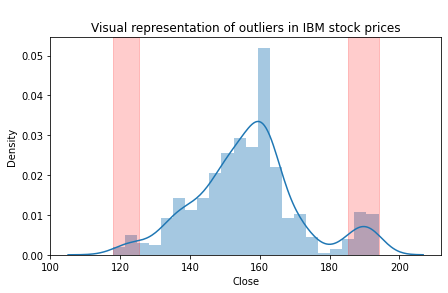

In [13]:
""" Apply IQR method """
def out_iqr(df, column):
    global lower, upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # Calculate the IQR
    iqr = q75 - q25
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    # Calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is', iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0] + df2.shape[0])


out_iqr(ibm, 'Close')
plt.figure(figsize = (7, 4))
plt.title("\nVisual representation of outliers in IBM stock prices")
sbn.distplot(ibm['Close'], kde=True)
plt.axvspan(xmin=lower, xmax=ibm['Close'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=ibm['Close'].max(), alpha=0.2, color='red')
plt.show()

#**Stationarity test of IBM dataset (ADF)**

In [14]:
result = adfuller(ibm.Close.values)
print('ADF Statistics: ', result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t", key, value)

if result[0] < result[4]["5%"]:
    print ("IBM time series is Stationary")

else:
    print ("IBM time series is Non-Stationary")

ADF Statistics:  -2.279273436091478
p-value:  0.17873985447073382
Critical Values:
	 1% -3.44152019959894
	 5% -2.8664679191981297
	 10% -2.569394451038919
IBM time series is Non-Stationary


#**Stationarity test of IBM dataset (KPSS)**

In [15]:
result = kpss(ibm.Close.values, lags='auto')
print('KPSS Statistics: ', result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print("\t", key, value)

if result[0] > result[3]["5%"]:
    print ("IBM time series is Non-Stationary")
else:
    print ("IBM time series is Stationary")

KPSS Statistics:  1.4751080903830454
p-value:  0.01
Critical Values:
	 10% 0.347
	 5% 0.463
	 2.5% 0.574
	 1% 0.739
IBM time series is Non-Stationary


#**ACF and PACF analysis of IBM dataset**

IBM closing prices ==>



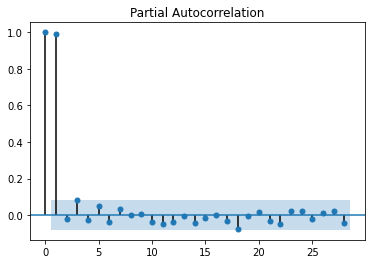

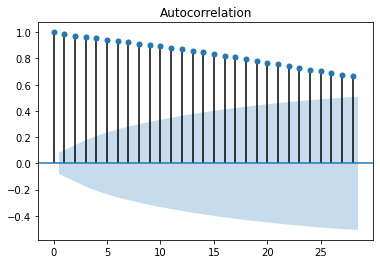

In [16]:
print("IBM closing prices ==>\n")
plot_pacf(ibm['Close'])
plt.show()

plot_acf(ibm['Close'])
plt.show()

#**Final stationarity and seasonality of IBM dataset**#

```
Both tests show IBM data is Non-Stationary.
However, lag-1 and lag-2 partial corelations are significant.
```

#**[2] Apple Stock Dataset analysis**

In [17]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,24.155001,23.702499,23.725000,24.032499,194044000.0,21.657644
2014-08-04,24.145000,23.792500,24.092501,23.897499,159832000.0,21.535982
2014-08-05,23.920000,23.590000,23.840000,23.780001,223732000.0,21.430096
2014-08-06,23.870001,23.677500,23.687500,23.740000,154232000.0,21.394049
2014-08-07,23.987499,23.525000,23.732500,23.620001,186844000.0,21.391787


#**Describe the APPLE dataset**

In [18]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    float64
 5   Adj Close  589 non-null    float64
dtypes: float64(6)
memory usage: 32.2 KB


In [19]:
aapl.describe(include='all')

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,27.992016,27.478374,27.743353,27.738748,1.891853e+08,25.586068
std,2.712822,2.695806,2.718831,2.700132,8.425158e+07,2.418740
min,22.917500,22.367500,22.500000,22.584999,4.590360e+07,21.134403
25%,25.547501,25.125000,25.327499,25.330000,1.311576e+08,23.305397
50%,27.969999,27.352501,27.657499,27.610001,1.733648e+08,25.591351
75%,29.807501,29.250000,29.497499,29.570000,2.243016e+08,27.354954
max,33.634998,32.849998,33.615002,33.250000,7.593852e+08,30.384638


#**Check for null values in APPLE dataset**

In [20]:
aapl.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

#**Visualize the APPLE dataset**

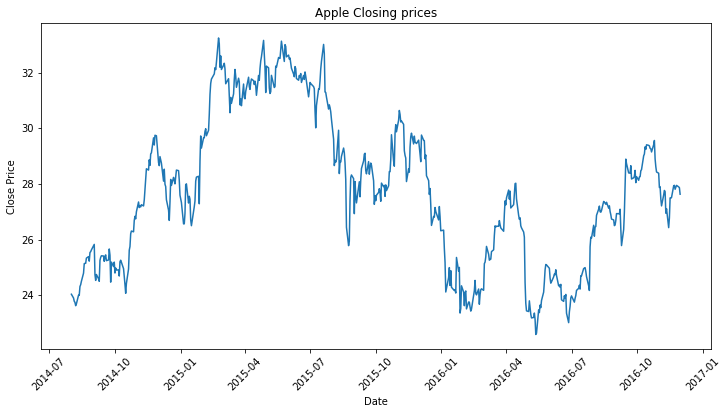

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'])
plt.title('Apple Closing prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

#**Visualize up and downs in APPLE stock prices**

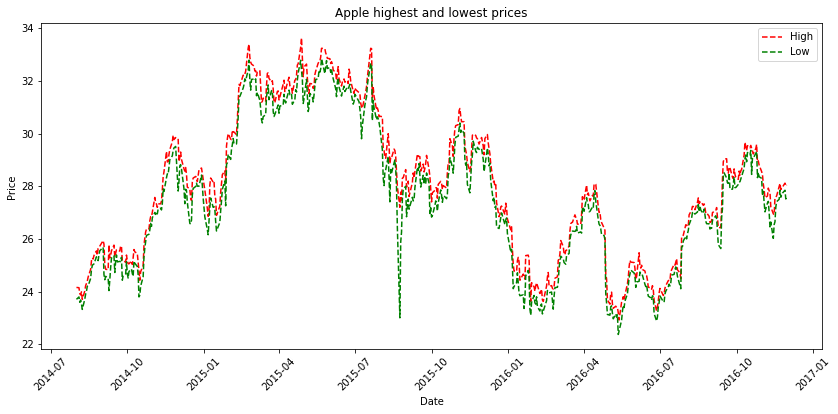

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(aapl['High'],'r--',label='High')
plt.plot(aapl['Low'],'g--',label='Low')
plt.title('Apple highest and lowest prices')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

#**Visualize short-term average of APPLE stock prices**

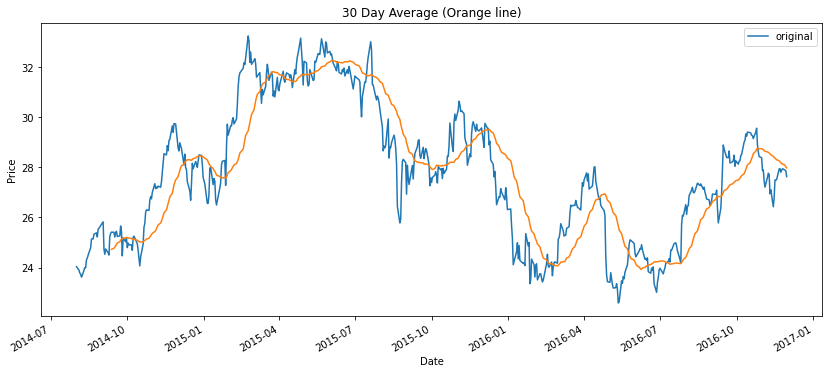

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(aapl['Close'],label='original')
plt.title('30 Day Average (Orange line)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
aapl['Close'].rolling(window=30).mean().plot()
plt.show()

**Stationarity Tests**

In [ ]:
result = adfuller(aapl.Close.values)
print('ADF Statistics: ', result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  -2.170604967096479
p-value:  0.21708657329505132
Critical Values:
1% -3.44152019959894
5% -2.8664679191981297
10% -2.569394451038919
Time Series is Non-Stationary


In [ ]:
result = kpss(aapl.Close.values,lags='auto')
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  0.7603426071219407
p-value:  0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Both adf and kpss tests indicates data is non-stationary.

# facebook

In [ ]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,73.220001,71.550003,72.220001,72.360001,43535000,72.360001
2014-08-04,73.879997,72.360001,72.360001,73.510002,30777000,73.510002
2014-08-05,73.589996,72.180000,73.199997,72.690002,34986000,72.690002
2014-08-06,73.720001,71.790001,72.019997,72.470001,30986000,72.470001
2014-08-07,74.000000,72.699997,73.000000,73.169998,38141000,73.169998


In [ ]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    int64  
 5   Adj Close  589 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 32.2 KB


In [ ]:
fb.describe(include='all')

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,98.479779,96.491545,97.527742,97.544160,2.754758e+07,97.544160
std,18.576699,18.438006,18.550756,18.511200,1.396508e+07,18.511200
min,73.220001,70.320000,70.790001,72.360001,5.913100e+06,72.360001
25%,80.000000,78.519997,79.300003,79.330002,1.889710e+07,79.330002
50%,96.099998,93.629997,94.949997,94.970001,2.400390e+07,94.970001
75%,115.010002,113.070000,114.070000,114.190002,3.196100e+07,114.190002
max,133.500000,132.220001,133.500000,133.279999,1.074753e+08,133.279999


In [ ]:
fb.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

(array([735415., 735507., 735599., 735689., 735780., 735872., 735964.,
        736055., 736146., 736238., 736330.]),
 <a list of 11 Text major ticklabel objects>)

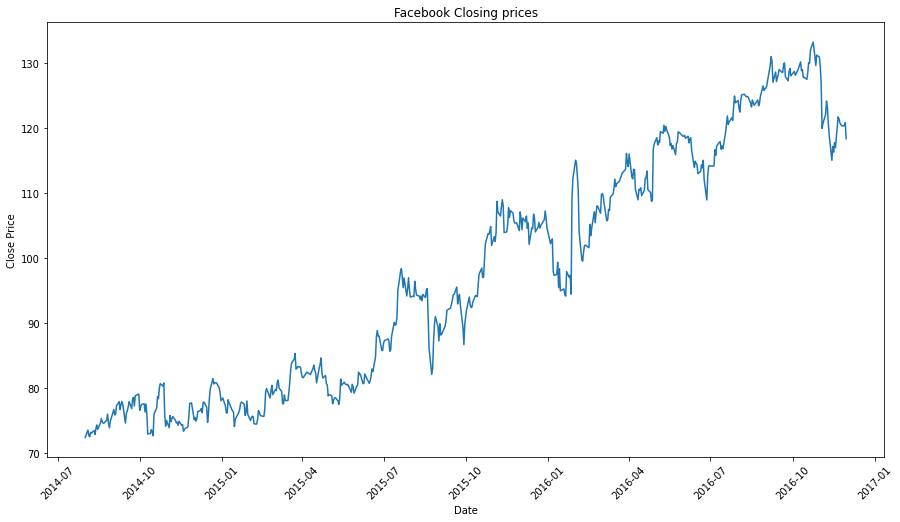

In [ ]:

plt.figure(figsize=(15,8))
plt.plot(fb['Close'])

plt.title('Facebook Closing prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

(array([735415., 735507., 735599., 735689., 735780., 735872., 735964.,
        736055., 736146., 736238., 736330.]),
 <a list of 11 Text major ticklabel objects>)

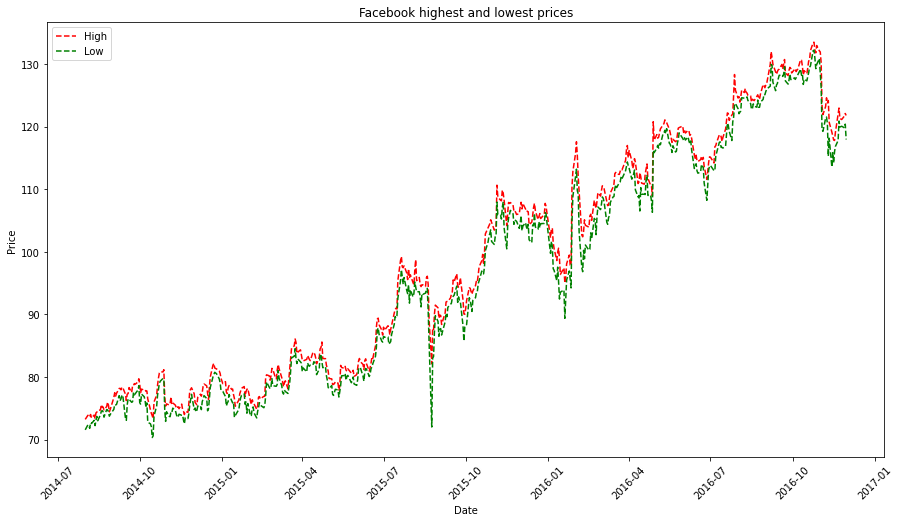

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(fb['High'],'r--',label='High')
plt.plot(fb['Low'],'g--',label='Low')
plt.title('Facebook highest and lowest prices')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

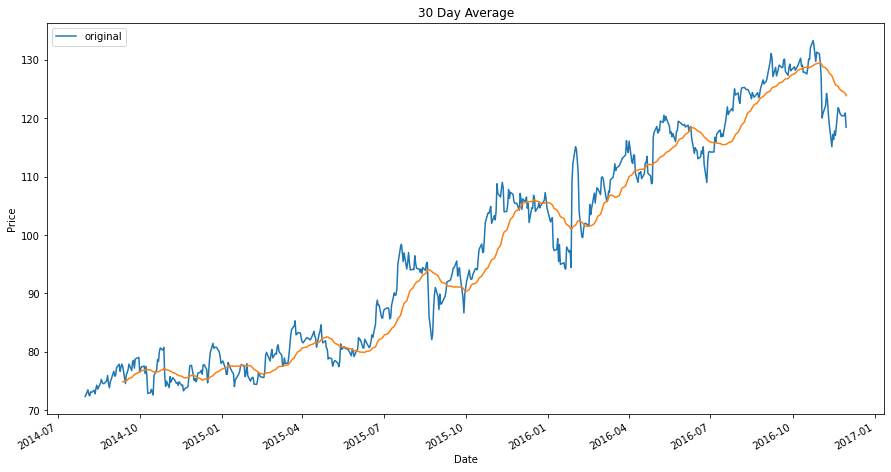

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(fb['Close'],label='original')
plt.title('30 Day Average')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
fb['Close'].rolling(window=30).mean().plot()

**Stationarity Tests**

In [ ]:
result = adfuller(fb.Close.values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  -0.9666437514463285
p-value:  0.765235036105904
Critical Values:
1% -3.441635870156286
5% -2.866518854162241
10% -2.569421591856497
Time Series is Non-Stationary


In [ ]:
result = kpss(fb.Close.values,lags='auto')
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  3.443631425546876
p-value:  0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


both adf and kpss indicates data is non-stationary

# google

In [ ]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,583.429993,570.299988,578.549988,573.599976,2213300,573.599976
2014-08-04,583.820007,572.260010,576.510010,582.270020,1519400,582.270020
2014-08-05,580.200012,570.309998,579.380005,573.140015,1643800,573.140015
2014-08-06,578.640015,567.450012,569.500000,574.489990,1322800,574.489990
2014-08-07,578.309998,569.429993,576.049988,571.809998,1163000,571.809998


In [ ]:
googl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    int64  
 5   Adj Close  589 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 32.2 KB


In [ ]:
googl.describe(include='all')

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,670.241070,658.717657,664.847572,664.520458,2.059138e+06,664.520458
std,101.589772,100.188867,100.998646,100.889144,1.074884e+06,100.889144
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998
25%,561.109985,552.260010,558.000000,556.809998,1.447600e+06,556.809998
50%,692.260010,673.679993,683.729980,681.140015,1.769100e+06,681.140015
75%,763.229980,751.570007,757.520020,757.650024,2.345900e+06,757.650024
max,839.000000,829.039978,838.500000,835.739990,1.285810e+07,835.739990


In [ ]:
googl.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

(array([735415., 735507., 735599., 735689., 735780., 735872., 735964.,
        736055., 736146., 736238., 736330.]),
 <a list of 11 Text major ticklabel objects>)

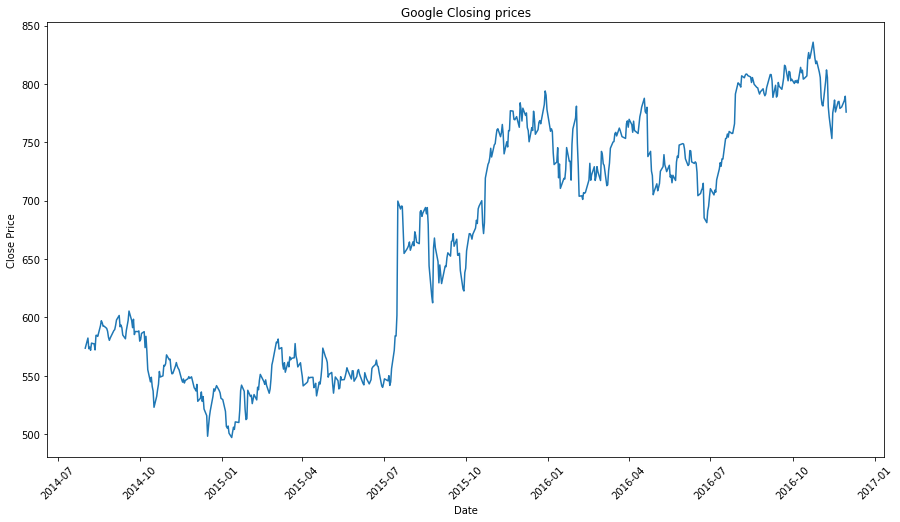

In [ ]:

plt.figure(figsize=(15,8))
plt.plot(googl['Close'])

plt.title('Google Closing prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

(array([735415., 735507., 735599., 735689., 735780., 735872., 735964.,
        736055., 736146., 736238., 736330.]),
 <a list of 11 Text major ticklabel objects>)

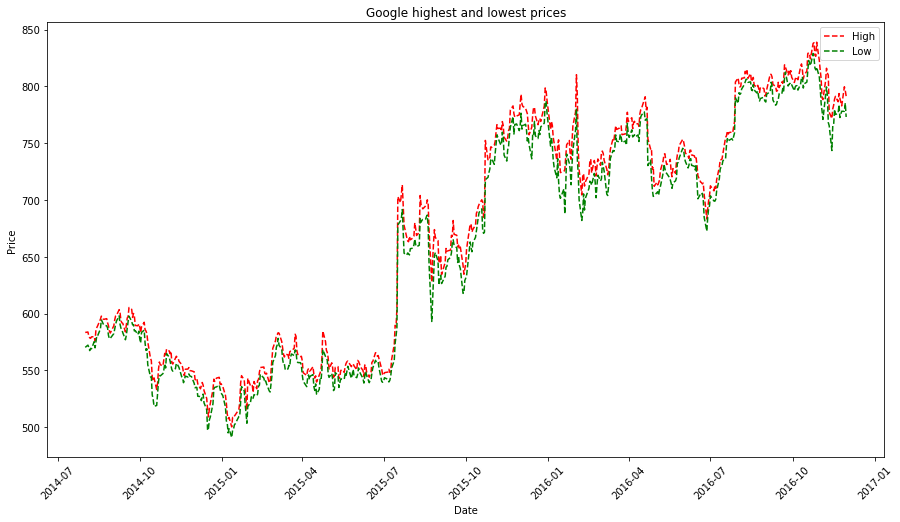

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(googl['High'],'r--',label='High')
plt.plot(googl['Low'],'g--',label='Low')
plt.title('Google highest and lowest prices')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

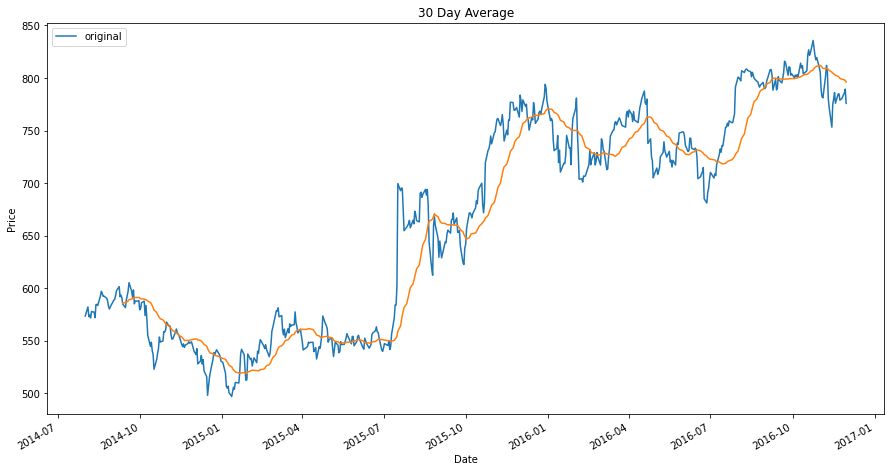

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(googl['Close'],label='original')
plt.title('30 Day Average')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
googl['Close'].rolling(window=30).mean().plot()

**Stationarity Tests**

In [ ]:
result = adfuller(googl.Close.values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  -1.092576812305331
p-value:  0.718023089682984
Critical Values:
1% -3.4415777369651717
5% -2.866493255736561
10% -2.569407951640003
Time Series is Non-Stationary


In [ ]:
result = kpss(googl.Close.values,lags='auto')
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  3.0992773913583935
p-value:  0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Both adf and kpss test indicates data is non-stationary

# Comparing Closing Prices 

Text(0.5, 1.0, 'Closing Prices ')

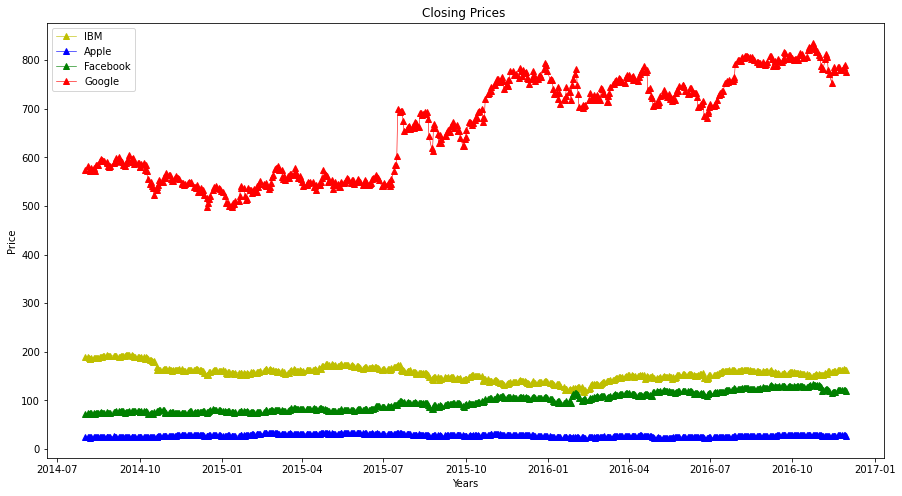

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(ibm.Close,'y^-',linewidth=0.6,label='IBM')
plt.plot(aapl.Close,'b^-',linewidth=0.6,label='Apple')
plt.plot(fb.Close,'g^-',linewidth=0.6,label='Facebook')
plt.plot(googl.Close,'r^-',linewidth=0.6,label='Google')
plt.xlabel('Years')
plt.ylabel('Price')

plt.legend(loc='upper left')
plt.title('Closing Prices ')

# Returns

In [ ]:
returns = pd.DataFrame()


In [ ]:
df = [ibm,aapl,fb,googl]

In [ ]:
ibm['newreturns'] = ibm.Close.pct_change()
aapl['newreturns'] = aapl.Close.pct_change()
fb['newreturns'] = fb.Close.pct_change()
googl['newreturns'] = googl.Close.pct_change()

In [ ]:
minreturns = pd.DataFrame(columns=['ibm','apple','fb','google'])

In [ ]:
for d in df:
  minreturns.loc[len(minreturns.index)]= [ibm['newreturns'].idxmin(),aapl['newreturns'].idxmin(),fb['newreturns'].idxmin(),googl['newreturns'].idxmin()]

print("Worst Drop Day for all Stocks")
pd.DataFrame(minreturns.iloc[0])

Worst Drop Day for all Stocks


,0
ibm,2014-10-20
apple,2016-01-27
fb,2014-10-29
google,2016-04-22


In [ ]:
maxreturns = pd.DataFrame(columns=['ibm','apple','fb','google'])

In [ ]:
for d in df:
  maxreturns.loc[len(maxreturns.index)]= [ibm['newreturns'].idxmax(),aapl['newreturns'].idxmax(),fb['newreturns'].idxmax(),googl['newreturns'].idxmax()]

print("Best Single gain day for all Stocks")
pd.DataFrame(maxreturns.iloc[0])

Best Single gain day for all Stocks


,0
ibm,2016-02-18
apple,2016-07-27
fb,2016-01-28
google,2015-07-17
